In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [36]:
df = pd.read_excel("Hospital_procedures_Analysis.xlsx", sheet_name="procedures cleaned data")
df.head(47700)

,START,STOP,AM or PM procedure,Total Duration of procedure (Hours:Minutes),Patient Name,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-01-02 01:26:36,2011-01-02 04:58:36,AM,03:32:00,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009.0,Renal dialysis (procedure),903.0,NaN,No provided reason
1,2011-01-02 21:44:39,2011-01-02 22:01:42,PM,00:17:03,Myrtis608,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001.0,Intramuscular injection,2477.0,NaN,No provided reason
2,2011-01-04 06:49:55,2011-01-04 07:04:55,AM,00:15:00,Tyree261,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,703423002.0,Combined chemotherapy and radiation therapy (p...,11620.0,363406005.0,Malignant tumor of colon
3,2011-01-04 20:02:09,2011-01-04 20:17:09,PM,00:15:00,Simon598,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,173160006.0,Diagnostic fiberoptic bronchoscopy (procedure),9796.0,162573006.0,Suspected lung cancer (situation)
4,2011-01-05 04:58:36,2011-01-05 08:42:36,AM,03:44:00,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,265764009.0,Renal dialysis (procedure),1255.0,NaN,No provided reason
...,...,...,...,...,...,...,...,...,...,...,...,...
47695,2022-01-29 12:12:53,2022-01-29 12:27:53,PM,00:15:00,Jaime666,20a4bc24-6b69-2f5c-dc74-1df390cae25b,07710480-9d6b-9c9b-87c3-c1d54df4069d,18286008.0,Catheter ablation of tissue of heart,10446.0,49436004.0,Atrial Fibrillation
47696,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,00:15:00,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,430193006.0,Medication Reconciliation (procedure),413.0,NaN,No provided reason
47697,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,00:15:00,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,274804006.0,Evaluation of uterine fundal height,3238.0,72892002.0,Normal pregnancy
47698,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,00:15:00,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,225158009.0,Auscultation of the fetal heart,7045.0,72892002.0,Normal pregnancy


In [59]:
def convert_min(value):
    try:
        
        if hasattr(value, 'hour') and hasattr(value, 'minute'):
            return value.hour * 60 + value.minute

        
        if isinstance(value, str) and " " in value:
            time_part = value.split(" ")[1] 
            h, m, *_ = time_part.split(":")
            return int(h) * 60 + int(m)

        parts = str(value).split(":")
        return int(parts[0]) * 60 + int(parts[1])
    except:
        return None


In [62]:
df = df.assign(duration_minutes = df['Total Duration of procedure (Hours:Minutes)'].apply(convert_min))
df = df.drop(columns = ['Total Duration of procedure (Hours:Minutes)'])
df.head(47000)

,START,STOP,AM or PM procedure,Patient Name,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION,duration_minutes
0,2011-01-02 01:26:36,2011-01-02 04:58:36,AM,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,2.657640e+08,Renal dialysis (procedure),903.0,NaN,No provided reason,212
1,2011-01-02 21:44:39,2011-01-02 22:01:42,PM,Myrtis608,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,7.660100e+07,Intramuscular injection,2477.0,NaN,No provided reason,17
2,2011-01-04 06:49:55,2011-01-04 07:04:55,AM,Tyree261,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,7.034230e+08,Combined chemotherapy and radiation therapy (p...,11620.0,363406005.0,Malignant tumor of colon,15
3,2011-01-04 20:02:09,2011-01-04 20:17:09,PM,Simon598,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,1.731600e+08,Diagnostic fiberoptic bronchoscopy (procedure),9796.0,162573006.0,Suspected lung cancer (situation),15
4,2011-01-05 04:58:36,2011-01-05 08:42:36,AM,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,2.657640e+08,Renal dialysis (procedure),1255.0,NaN,No provided reason,224
...,...,...,...,...,...,...,...,...,...,...,...,...
46995,2021-11-17 12:02:10,2021-11-17 12:42:35,PM,Trinidad33,a6edb3a5-9e0c-380d-b42e-6b98720ee617,3d1d80fc-270b-eb74-0851-311d53602336,7.108240e+08,Assessment of health and social care needs (pr...,431.0,NaN,No provided reason,40
46996,2021-11-17 12:42:35,2021-11-17 13:04:48,PM,Trinidad33,a6edb3a5-9e0c-380d-b42e-6b98720ee617,19a9e447-1091-8994-f610-d708c83a0435,7.108410e+08,Assessment of anxiety (procedure),431.0,NaN,No provided reason,22
46997,2021-11-17 13:04:48,2021-11-17 13:19:41,PM,Trinidad33,a6edb3a5-9e0c-380d-b42e-6b98720ee617,19a9e447-1091-8994-f610-d708c83a0435,1.712070e+08,Depression screening (procedure),431.0,NaN,No provided reason,14
46998,2021-11-17 13:19:41,2021-11-17 13:48:58,PM,Trinidad33,a6edb3a5-9e0c-380d-b42e-6b98720ee617,19a9e447-1091-8994-f610-d708c83a0435,4.547110e+14,Depression screening using Patient Health Ques...,431.0,NaN,No provided reason,29


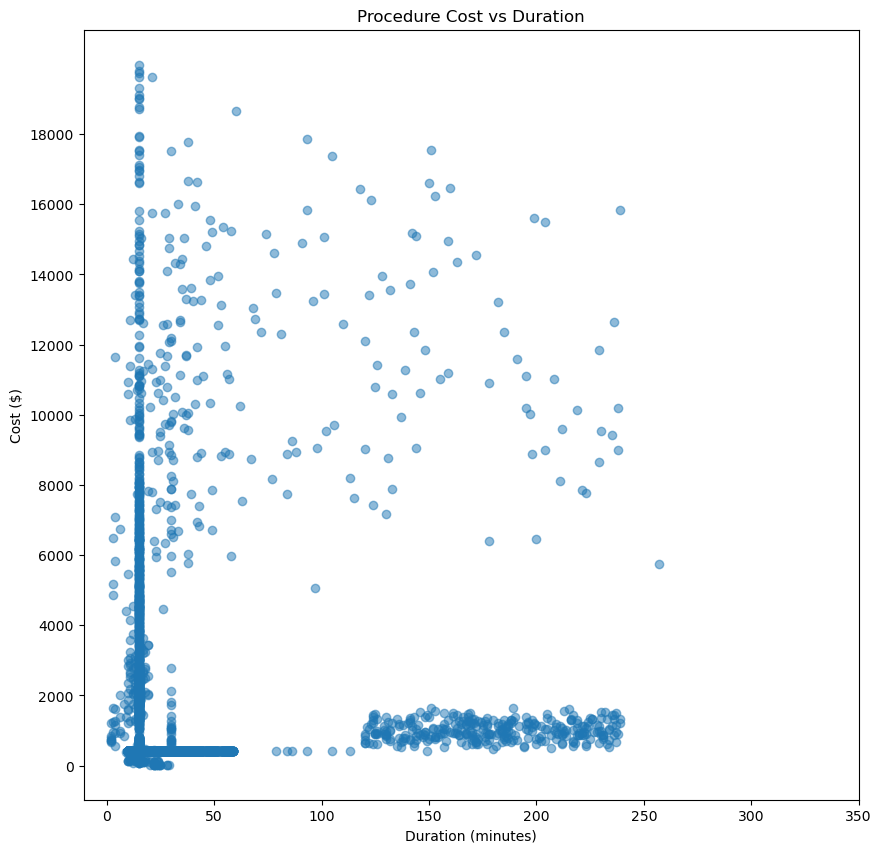

In [93]:
new_df = df[["BASE_COST", "duration_minutes"]].iloc[range(0, 5000)]
new_df = new_df[new_df['BASE_COST'] < 20000]
plt.figure(figsize=(10,10))
plt.scatter(new_df['duration_minutes'], new_df['BASE_COST'], alpha=0.5)


plt.xticks(ticks=range(0, 400, 50)) 
plt.yticks(ticks=range(0, 20000, 2000))  
plt.xlabel("Duration (minutes)")
plt.ylabel("Cost ($)")
plt.title("Procedure Cost vs Duration")
plt.show()

In [69]:
a = max(df.get("BASE_COST"))
print(a)
        

1080
